<a href="https://colab.research.google.com/github/Armestrong/data_science_analizingData_airbnb/blob/master/ATT_01_PROJETO_An%C3%A1lise_dos_Dados_do_Airbnb_Hong_Kong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Armestrong/data_science_analizingData_airbnb/blob/master/CAPA/HONG%20KONG.jpg?raw=true">

# Análise dos Dados do Airbnb - Hong Kong

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Hong Kong, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Por onde começamos ?

Existe vários jeitos para se começar um projeto, não existe uma regra, e você mesmo pode criar a seu próprio framework.

Eu nesta etapa utilizarei um modelo que adoto em todo o projeto para começar a analisa-lo, que contem 7 etapas, mas para esse projeto em especial utilizarei somente 5, que são:

* Introdução
* Dicionario das variáveis
* Análise exploratória
* Preparação dos dados
* Conclusão

Explicarei melhor ao longo de cada etapa o que cada uma se propõe a faz

# INTRODUÇÃO

AEtapa de **Introdução** tem como objetivo me fornecer informações para que eu posso fazer perguntar, como, " *tenho 500 clientes, mas quantos deles são homens ou mulheres* " ou " *Qual o produto mais vendido* ".

Nessa etapa costumo utilizar 4 passos que sao colocados em **Importes** e **Análise Inicial**

* Importes
  * Pacotes e dataset
* Análise Inicial
  * 5 primeiras linhas
  * Tamanho do dataset
  * Tipos das variáveis
* Análise Exploratoria
  * Perguntas que surgem
  * Insights
  * visualizações graficas




## 1 - Importando pacotes e dataset
Todos os dados utilizados aqui foram obtidos no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nesta etapa de baixar os pacotes e o arquivo csv, existem 2 tipos de arquivos que podemos baixar no site do Airbnb, um mais robusto ou um mais enxuto, e para este projeto utilizaremos o mais enxuto, que é dado o nome de:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*



In [0]:
# importar os pacotes necessarios
import pandas as pnd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
hk = pnd.read_csv('http://data.insideairbnb.com/china/hk/hong-kong/2019-09-20/visualisations/listings.csv')

## 2 - Análise Inicial

Aqui, como dito anteriormente, analisamos:

* 5 primeiras linhas - método **`head()`** que nos mostra as 5 primeiras linhas do dataset, onde conseguimos ver quais são as tabelas e seus valores.
* Tamanho do dataset - utilizando método de **`format`**(com a função **`shape`**)
* Tipos de variáveis - com o método **`dtypes`**




### 5 Primeiras linhas

In [0]:
#Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.
#Mostrar as 5 primeiras entradas
hk.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1409,3,132,2019-09-05,1.26,1,173
1,101765,Lamma Island flat 2min walk from the beach!,532909,Michael,NaN,Islands,22.20022,114.13461,Entire home/apt,431,2,11,2019-06-09,0.62,1,19
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28407,114.15570,Entire home/apt,853,2,262,2019-07-22,2.61,12,329
3,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28868,114.14494,Entire home/apt,1057,2,263,2019-08-15,2.64,12,323
4,133390,"Soho, Hong Kong 1 bedroom flat",654642,Robin,NaN,Central & Western,22.28343,114.15539,Entire home/apt,939,2,27,2015-06-30,0.27,1,0


### Tamanho do dataset

In [0]:
# identificar o volume de dados do DataFrame
print("Váriaveis = Linhas:\t{}".format(hk.shape[0]))
print("Entradas = Colunas:\t{}\n".format(hk.shape[1]))

Váriaveis = Linhas:	12627
Entradas = Colunas:	16



### Tipos de Váriaveis


In [0]:
# Tipos de variaveis do dataset
display(hk.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


# DICIONÁRIO DE VARIÁVEIS


No nosso dicionário de variáveis procuro deixar mais entendível o que cada nome de tabela significa e tipar seus valores como :

* Caracteres - Categóricas : nome ou siglas
* Numéricas
  * Chave Primária - Numero de identificação único.
  * Discreta - Int: valores como 1, 2, 3 ...
  * Contínuas - Float/Double: valores como 1,12 - 3,14 - 1.121 ...

`- Melhor explicação nesse ` [link ](https://support.minitab.com/pt-br/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/)



**Dicionário das variáveis**

* ***id*** - Número de id gerado para identificar o imóvel.
* ***name*** - Nome da propriedade anunciada.
* ***host_id*** - Numero de id do proprietário (anfitrião) da propriedade.
* ***neighbourhood_group*** - Esta coluna não contem nenhum valor valido.
* ***neighbourhood*** - Nome dos distritos.
* ***latitude*** - Coordenada da latitude da propriedade.
* ***longitude*** - Coordenada da longitude da propriedade.
* ***room_type*** - informa o tipo da propriedade (apartamento todo/quarto/...)
* ***price*** - Valor do aluguel da propriedade/imóvel.
* ***minimum_nights*** - Quantidade mínima de noites para reservar.
* ***number_of_reviews*** - Numero de avaliações que a propriedade possui
* ***last_review*** - Data do ultimo avaliação.
* ***reviews_per_month*** - Quantidade de avaliações por mês.
* ***calculated_host_listings_count*** - Quantidade de imóveis do mesmo anfitrião.
* ***availability_365*** - Número de dias de disponibilidade dentro de 365 dias.




**Tipos de variaveis**
* *Numericas*
 * *Chave primaria*
   * *id*
 * *Discretas* **Int**
   * *host_id*
   * *price*
   * *minimum_nights*
   * *number_of_reviews*
   * *calculated_host_listings_count*
   * *availability_365*

 * *Continuas* **Float / Double**
   * *neighbourhood_group*
   * *latitude*
   * *longitude*
   * *reviews_per_month*
 
  * *Categoricas* **String/Object**
    * *name*
    * *host_name*
    * *neighbourhood*
    * *room_type*
    * *last_review*

  * Dataset **Tamanho**
    * `Entrada   = Colunas` - 16
    * `Variaveis = Valores` - 12627


# ANÁLISE EXPLORATÓRIA

Agora vamos explorar todo nosso `dataset` para podermos começar a tirar insights dele, *mas que análise deve se fazer?*. Existem alguns métodos e gráficos que podem nos dar um norte.

Esses métodos & gráficos são:

* `isnull` Para sabermos se há valores nulos.
* `describe` Para termos um resumo estatístico do dataset.  
* `groupby` Agrupa um conjunto de valores por determinda requisição .
* `hist` Para plotarmos um gráfico e compararmos as variáveis `price` e `neighbourhood`. 
* `subplot` Faz o mesmo que o `hist` porém utilizando a biblioteca matplotlib. 
* `boxplot` Para plotarmos um gráfico e descobrirmos se há valores discrepantes. 
* `heatmap` Para plotarmos um gráfico e descobrir se há alguma correlação entre os dados. 
* `scatterplot` Um grafico de dispersão que utiliza condenadas para exibir valores. 

Bom, aparentemente esse monte de método e plotagem de gráficos são apenas informações soltas, certo? Então vamos dar uma logica a tudo isso.

É sempre bom observar os valores ausentes podem alterar nossas media, e nos dar valores irrealistas. Então acho que daqui em diante podemos fazer algumas perguntas, como:


### **Q1. Qual a porcentagem de valores ausentes no *dataset*?**

In [0]:
#Quantidade de valores faltantes por coluna
hk.isnull().sum()

id                                    0
name                                  9
host_id                               0
host_name                             2
neighbourhood_group               12627
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3940
reviews_per_month                  3940
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Vimos que 4 entradas possuem valores ausentes

* `neighbourhood_group` - 12.627 valores ausentes
* `last_review` - 3.940 valores ausentes
* `reviews_per_month` - 3.940 valores ausentes
* `host_name` - 2 valores ausentes

Mas, o que isso representa do total de cada coluna? Para isso transformamos em percentagem.


In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(hk.isnull().sum()/ hk.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.312030
last_review                       0.312030
name                              0.000713
host_name                         0.000158
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

### **Q2. Qual o tipo de distribuição das variáveis?**

Aqui nos vemos qual a discrepância dos valores, e fazemos algumas perguntas como, *Porque tal valor é tão prevalente em somente um lugar do gráfico?*


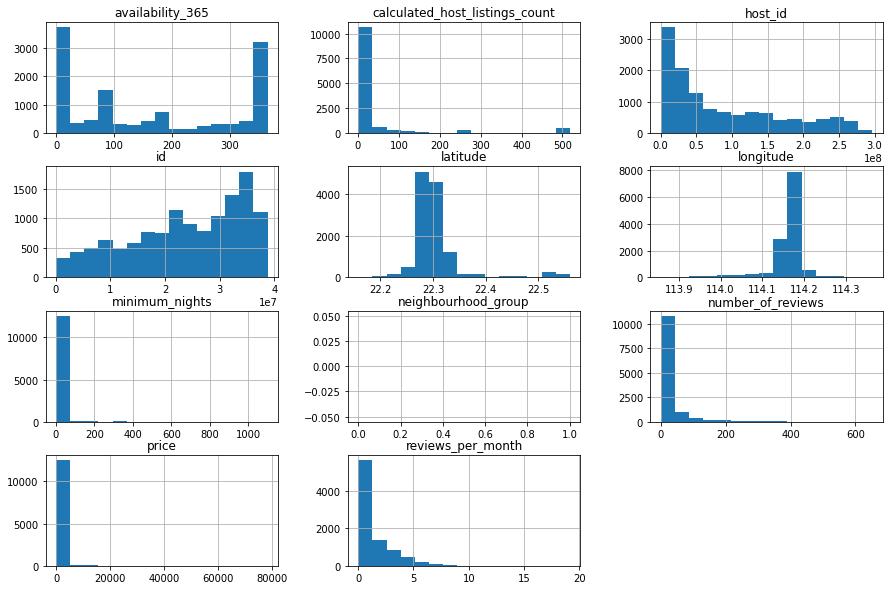

In [0]:
# plotar o histograma das variáveis numéricas
hk.hist(bins=15, figsize=(15,10));

### **Q3. Há Outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*.Por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma destruição natural, e distorcem toda a representação gráfica. Para verificarmos isso, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.


In [0]:
# ver o resumo estatístico das variáveis numéricas
hk[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,12627.000000,12627.000000,12627.000000,8687.000000,12627.000000,12627.000000
mean,760.615031,8.238061,20.764394,1.383763,40.091471,163.962065
std,1701.595702,29.101999,43.501849,1.638431,108.577260,146.408094
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,329.000000,1.000000,0.000000,0.240000,1.000000,1.000000
50%,501.000000,2.000000,3.000000,0.730000,4.000000,117.000000
75%,853.000000,4.000000,19.000000,2.000000,16.000000,344.000000
max,78282.000000,1100.000000,651.000000,19.150000,518.000000,365.000000


**Uma descrição rápida para melhor entendimento**
* **count** - quantidade de entradas válidas
* **mean** - média dos valores
* **std** - desvio padrão / Outliers
* **min** - menor valor da coluna
* **25%** - percentil 25: há uma media de valores x abaixo de 25%
* **50%** - percentil 50 (e mediana): há uma media de valores x abaixo de 50%
* **75%** - percentil 75: há uma media de valores x abaixo de 70%
* **max** - maior valor da coluna


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 832, porém seu valor máximo é 78282.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

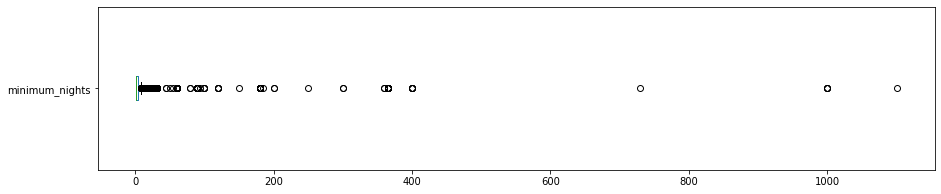

minimum_nights: valores acima de 30:
278 entradas / valores
2.2016%


In [0]:
# minimum_nights
hk.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas / valores".format(len(hk[hk.minimum_nights > 30])))
print("{:.4f}%".format((len(hk[hk.minimum_nights > 30]) / hk.shape[0])*100))

#### Boxplot para price

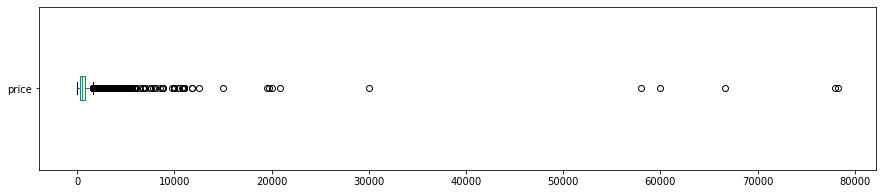


price: valores acima de 1500
913 entradas / valores
7.2305%


In [0]:
# price
hk.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas / valores".format(len(hk[hk.price > 1500])))
print("{:.4f}%".format((len(hk[hk.price > 1500]) / hk.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

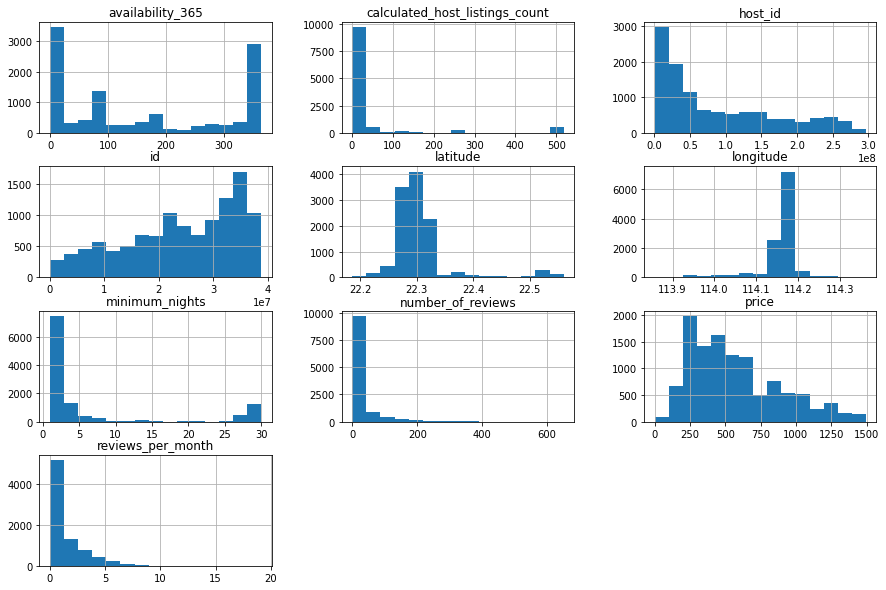

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = hk.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Aqui vamos verificar qual a media de preço antes e depois de limparmos os dados retirando os *outliers*

In [0]:
# ver a média da coluna 'price' antes
print("VALOR ANTES: {:.3f} ".format(hk.price.mean()))

VALOR ANTES: 760.615 


In [0]:
# ver a média da coluna 'price' depois
print("VALOR ANTES: {:.3f} ".format(df_clean['price'].mean()))

VALOR ANTES: 560.367 


### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [0]:
# criar uma matriz de correlação
corrhk = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr();

display(corrhk)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.221651,0.069319,0.021623,-0.288913,-0.210106
minimum_nights,-0.221651,1.000000,-0.206184,-0.190246,0.635154,0.373348
number_of_reviews,0.069319,-0.206184,1.000000,0.683676,-0.136321,0.045848
reviews_per_month,0.021623,-0.190246,0.683676,1.000000,-0.040036,0.086467
calculated_host_listings_count,-0.288913,0.635154,-0.136321,-0.040036,1.000000,0.392672
availability_365,-0.210106,0.373348,0.045848,0.086467,0.392672,1.000000


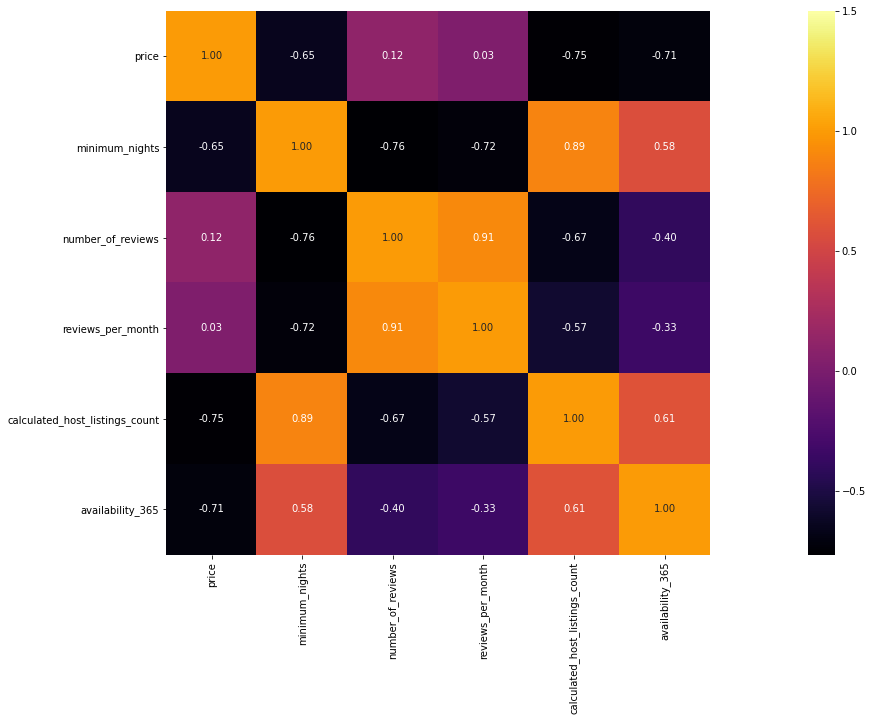

In [0]:
# mostrar a matriz de correlação
plt.subplots(figsize=(35,10))
sns.heatmap(corrhk.corr(), cmap='inferno', fmt='.2f', square=True, vmax=1.5, linecolor='white', annot=True);

### **Q6. Qual a localidade mais cara de Hong Kong?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os distritos (*neighbourhoods*) a partir do preço de locação.


In [0]:
# ver a media de preços por distritos no dataset bruto
hk.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)


neighbourhood
Tai Po               1968.385965
Southern             1868.509434
Tsuen Wan            1429.973333
Kwai Tsing            976.395349
Kowloon City          872.186858
Central & Western     814.777820
Sai Kung              813.401274
Islands               766.184015
Kwun Tong             745.823529
Yau Tsim Mong         744.620042
Wan Chai              710.232538
Sha Tin               703.563025
Eastern               650.226131
North                 574.544118
Yuen Long             531.898438
Tuen Mun              501.472727
Wong Tai Sin          493.923077
Sham Shui Po          460.968992
Name: price, dtype: float64

Se fizermos uma pesquisa rapida por *Os distritos mais famosos de Hong Kong*, você e capaz de perceber que, entre as populares e conhecidas cidade, a cidade de *Tai Po* não está nem entre as 5 principais cidades, então como ela pode estar entre as mais caras? 

Se olharmos com atenção, utilizei a base de dados "bruta", que ainda não tinha sido limpado os *Outliers*, agora vamos análisar com a dataset já tratado.


In [0]:
# ver a media de preços por distritos no dataset novo
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Central & Western    685.814064
Southern             683.535211
Islands              631.955823
Tsuen Wan            625.311475
Kwai Tsing           614.685714
Sai Kung             584.548611
Wan Chai             570.520930
Eastern              536.334254
Tai Po               518.865385
Kowloon City         511.178733
Yau Tsim Mong        510.670124
Tuen Mun             505.240741
Kwun Tong            477.719298
Yuen Long            472.379032
Sha Tin              464.972727
Wong Tai Sin         460.041667
Sham Shui Po         439.991031
North                372.950192
Name: price, dtype: float64

Então aqui pudemos perceber a importância do cuidado com os dados, e de como sempre questiona-los é importante.

Agora vou fazer uma comparação rapida entre o distritos de *Tai Po* e *Central & Western* utilizando os 2 tipos de dataset.

* `hk` - Dataset bruto sem alteração.
* `df_clean` - Dataset eliminado de ruídos.

Lembrando, o dataset sem ruídos foi retirado os valores `price` acima de 1500 e noite mínimas `minimum_nights` maiores de 30.


### **Q11. Quanto eu pagaria no aluguel mais caro em R$?**


In [0]:
print("VALOR DO ALUGUEL MAIS CARO {:,.02f}:".format(df_clean.price.max()))
print("VALOR EM DO ALUGUEL MAIS CARO EM REAIS : R${:0.02F}".format(df_clean.price.max() * 0.65)) #DIA 13-06-2020



VALOR DO ALUGUEL MAIS CARO 1,495.00:
VALOR EM DO ALUGUEL MAIS CARO EM REAIS : R$971.75


------------------------------------------------------
### **Q7. Porque o resultado muda dependendo do dataset utilizado?**

Para conseguir esclarecer essa pergunta seria interensante analisar o antes de depois graficamente.

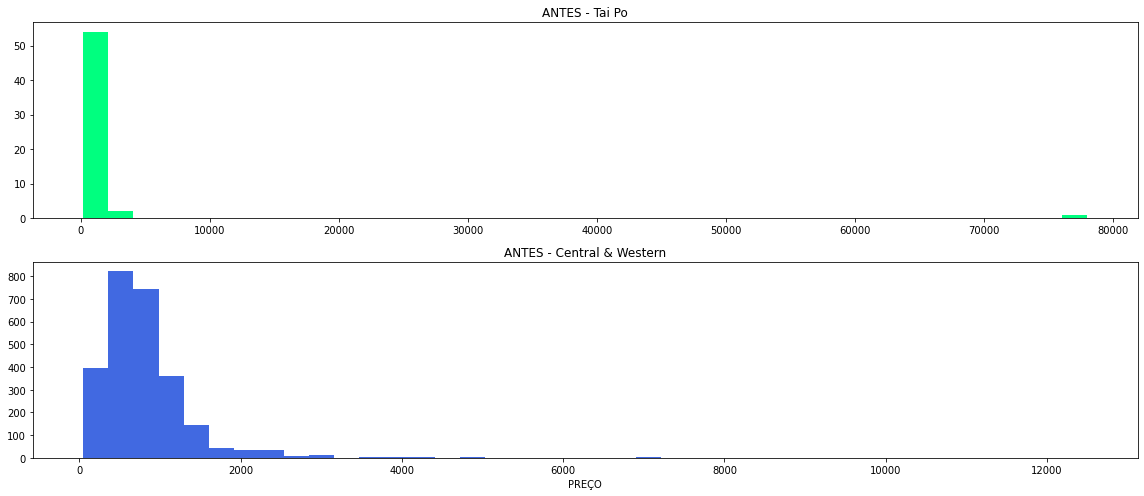

In [0]:
#Plotando grafico de histograma
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,7))
num_bins = 40

ax[0].hist(hk.price[hk.neighbourhood == 'Tai Po'], bins=num_bins, color='springgreen')
ax[0].set_title('ANTES - Tai Po')

ax[1].hist(hk.price[hk.neighbourhood == 'Central & Western'], bins=num_bins, color='royalblue')
ax[1].set_title('ANTES - Central & Western')

plt.xlabel('PREÇO')
plt.tight_layout()

Aqui comparamos a distribuição dos preços do bairro de *Tai Po* e *Central & Western* e conseguimos observar que a cidade de *Central & Western* esta muito mais bem distribuída.

In [0]:
#hk.loc[(hk.neighbourhood == 'Tai Po') & (hk.price), ['neighbourhood','price']].hist(bins=20, figsize=(15,9));
#hk.loc[(hk.neighbourhood == 'Central & Western') & (hk.price), ['neighbourhood','price']].hist(bins=20, figsize=(15,9));

In [0]:
#ANTES, BAIRRO DE Tai Po 
hk.loc[(hk.neighbourhood == 'Tai Po') & (hk.price >=1500), ['neighbourhood','price']].sort_values(by="price", ascending=False)

,neighbourhood,price
3886,Tai Po,78000
10258,Tai Po,2497
3464,Tai Po,2325
6458,Tai Po,1996


In [0]:
print('----------------')
print('A media de preço do bairro da cidade de Tai Po é de : DHK$ {:,.2f}'.format(hk[hk.neighbourhood == 'Tai Po'].price.mean()))
print('----------------')

----------------
A media de preço do bairro da cidade de Tai Po é de : DHK$ 1,968.39
----------------


In [0]:
#ANTES, BAIRRO DE Central & Western
hk.loc[(hk.neighbourhood == 'Central & Western') & (hk.price >=1500), ['neighbourhood','price']].sort_values(by="price", ascending=False).head(10)

,neighbourhood,price
9474,Central & Western,12503
5970,Central & Western,11798
133,Central & Western,6999
3544,Central & Western,6983
5816,Central & Western,6498
4763,Central & Western,5997
6812,Central & Western,5692
3840,Central & Western,5504
10971,Central & Western,5018
7930,Central & Western,5003


In [0]:
print('----------------')
print('A media de preço do bairro da cidade de Central & Western é de : DHK$ {:,.2f}'.format(hk[hk.neighbourhood == 'Central & Western'].price.mean()))
print('----------------')

----------------
A media de preço do bairro da cidade de Central & Western é de : DHK$ 814.78
----------------


Bom, é visto que por conta de um valor toda a media foi alterada, na cidade de *Tai Po* existe um valor muito alto de 78.000, maior que todos os outros, que puxa a media lá pra cima 1,968.39.

Por outro lado, o bairro de *Central & Western* é mais compacto e realista em sua media de 814.78. Mas agora vamos utilizar os dados que eliminamos os *Outliers* e ver os resultados. 

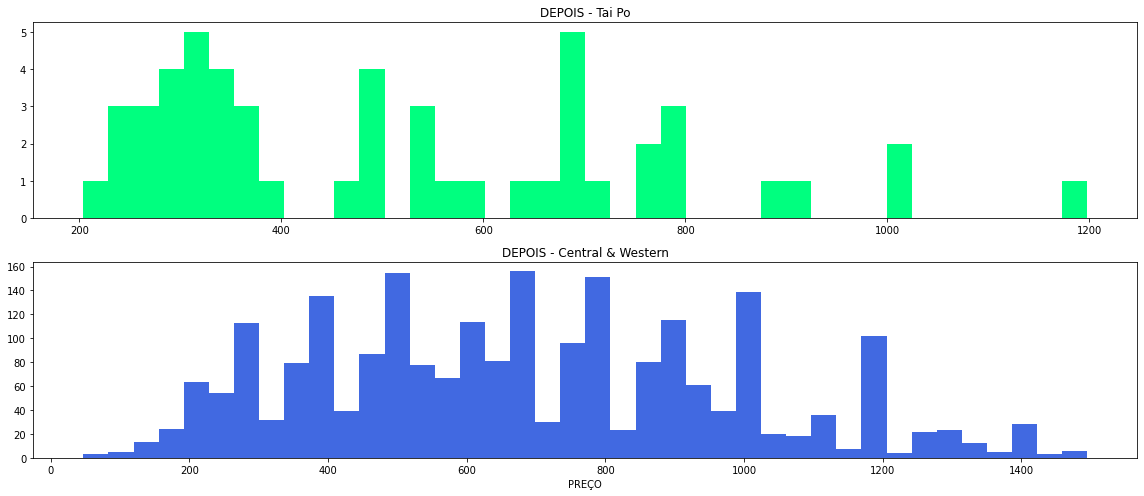

In [0]:
#Plotando grafico de histograma
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,7))
num_bins = 40

ax[0].hist(df_clean.price[df_clean.neighbourhood == 'Tai Po'], bins=num_bins, color='springgreen')
ax[0].set_title('DEPOIS - Tai Po')

ax[1].hist(df_clean.price[df_clean.neighbourhood == 'Central & Western'], bins=num_bins, color='royalblue')
ax[1].set_title('DEPOIS - Central & Western')

plt.xlabel('PREÇO')
plt.tight_layout()

In [0]:
#DEPOIS, BAIRRO DE Tai Po 
df_clean.loc[(df_clean.neighbourhood == 'Tai Po') & (df_clean.price), ['neighbourhood','price']].sort_values(by="price", ascending=False).head(10)

,neighbourhood,price
4995,Tai Po,877
4482,Tai Po,799
2670,Tai Po,799
699,Tai Po,799
5548,Tai Po,697
375,Tai Po,697
11399,Tai Po,689
5315,Tai Po,689
6451,Tai Po,681
6928,Tai Po,665


In [0]:
print('----------------')
print('A media de preço do bairro da cidade de Tai Po é de : DHK$ {:,.2f}'.format(df_clean[df_clean.neighbourhood == 'Tai Po'].price.mean()))
print('----------------')

----------------
A media de preço do bairro da cidade de Tai Po é de : DHK$ 518.87
----------------


In [0]:
#DEPOIS, BAIRRO DE Central & Western
df_clean.loc[(df_clean.neighbourhood == 'Central & Western') & (df_clean.price), ['neighbourhood','price']].sort_values(by="price", ascending=False).head(10)

,neighbourhood,price
10027,Central & Western,1495
8310,Central & Western,1495
1752,Central & Western,1417
0,Central & Western,1409
12099,Central & Western,1409
1414,Central & Western,1401
10278,Central & Western,1401
555,Central & Western,1401
9287,Central & Western,1401
3114,Central & Western,1401


In [0]:
print('----------------')
print('A media de preço do bairro de Central & Western é de : DHK$ {:,.2f}'.format(df_clean[df_clean.neighbourhood == 'Central & Western'].price.mean()))
print('----------------')

----------------
A media de preço do bairro de Central & Western é de : DHK$ 685.81
----------------


Como reultado disso obtemos os resultados:

* MÉDIA DE **TAI PO** ANTES -  HKD 1,968.39
* MÉDIA DE **CENTRAL & WESTERN** ANTES -  HKD 814.78
-----
* MÉDIA DE **TAI PO** DEPOIS -  HKD 518.87
* MÉDIA DE **CENTRAL & WESTERN** DEPOIS -  HKD 685.81

A diferença e nitida no bairro de Tai Po mas a cidade de Central & Western não teve grande perca em sua media de preço.

### **Q8. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [0]:
# mostrar a quantidade de cada tipo de imóvel
df_clean.room_type.value_counts()

Entire home/apt    5267
Private room       5257
Shared room         578
Hotel room          346
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
pie_chart = df_clean.room_type.value_counts() / df_clean.shape[0]*100
pie_chart

Entire home/apt    46.008036
Private room       45.920685
Shared room         5.048917
Hotel room          3.022362
Name: room_type, dtype: float64

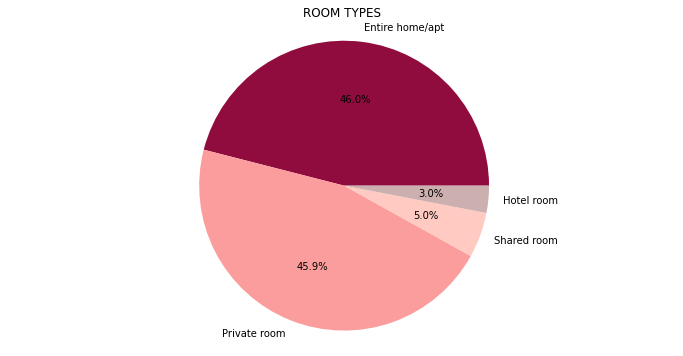

In [0]:
fig, eixos = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
# Cria o gráfico de pizza na primeira posição com as configurações definidas
pie_1 = eixos.pie(pie_chart, labels=['Entire home/apt','Private room','Shared room','Hotel room'],
                    autopct='%1.1f%%', colors=['#900c3f', '#fc9d9d','#ffcac2','#ccafaf'])
# Define o título deste gráfico
eixos.set_title('ROOM TYPES')
# Deixa os dois eixos iguais, fazendo com que o gráfico mantenha-se redondo
eixos.axis('equal')
plt.show()

#### **Qual a media de preço dos tipos de imoveis mais alugados dependendo do distrito?**

Utilizarei os 3 tipos de `room_type` mas alugados, e ordenarei por media de preço de cada bairro.


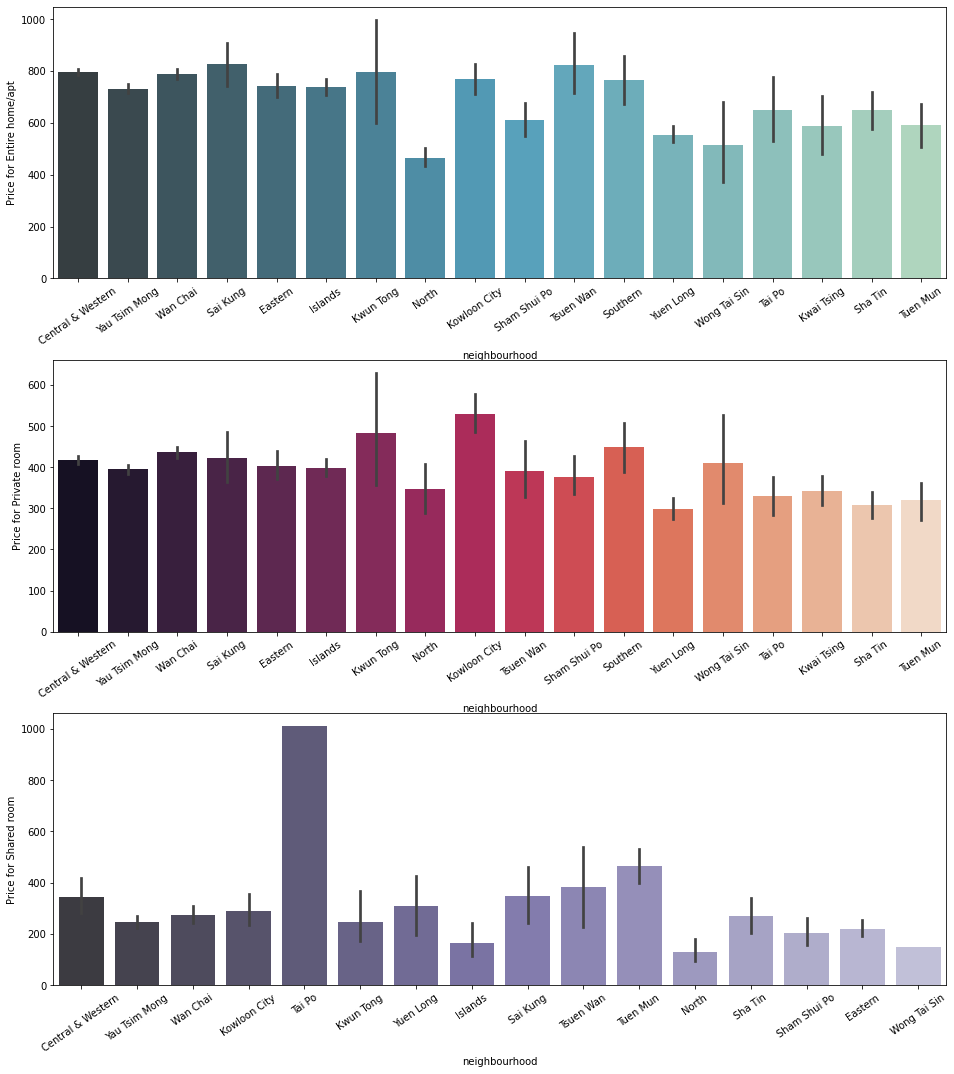

In [0]:
# Agrupando os valores room_type', 'neighbourhood pela coluna preço
toprp = df_clean.groupby(['room_type', 'neighbourhood'])['price'].mean().reset_index()
toprp = df_clean.sort_values('price', ascending=False).reset_index(drop=True)

# Separando os 3 tipos de imoveis mais alugados
toprp_pv = toprp[toprp['room_type']=='Private room'].reset_index(drop=True)
toprp_en = toprp[toprp['room_type']=='Entire home/apt'].reset_index(drop=True)
toprp_sr = toprp[toprp['room_type']=='Shared room'].reset_index(drop=True)

# plotando em grafico
fig, axarr = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

# Entire home/apt
sns.barplot(x=toprp_en['neighbourhood'], y=toprp_en['price'],
            palette='GnBu_d', ax=axarr[0])
axarr[0].tick_params(axis='x', rotation = 35)
axarr[0].set_ylabel('Price for Entire home/apt')

#private room
sns.barplot(x=toprp['neighbourhood'], y=toprp_pv['price'],
            palette='rocket', ax=axarr[1])
axarr[1].tick_params(axis='x', rotation = 35)
axarr[1].set_ylabel('Price for Private room')

# Shared room
sns.barplot(x=toprp_sr['neighbourhood'], y=toprp_sr['price'],
            palette='Purples_d', ax=axarr[2])
axarr[2].tick_params(axis='x', rotation = 35)
axarr[2].set_ylabel('Price for Shared room')

plt.subplots_adjust(hspace=0.3)
# plt.savefig('avg_price_nbh_room_type.png', bbox_inches='tight')


### **Q9. Como seria os 2 tipos de dataset representado em gráficos**

Vamos analisar a diferença entre os dos dataset visualizados graficamente

Nos é fornecido a longitude e latitude, e com isso conseguimos plotar um gráfico e sabermos qual região tem mais porcentagem de aluguéis.

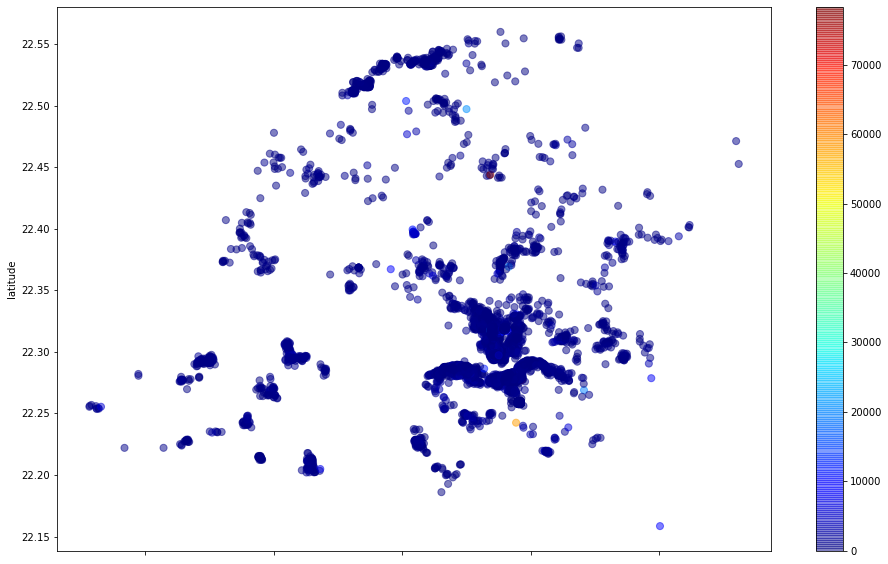

In [0]:
# DADOS BRUTOS SEM NENHUMA ALTERAÇÃO
# plotar os imóveis pela latitude-longitude
hk.plot(kind="scatter", x='longitude', y='latitude', alpha=0.5, c=hk['price'], s=50, cmap=plt.get_cmap('jet'), figsize=(16,10));

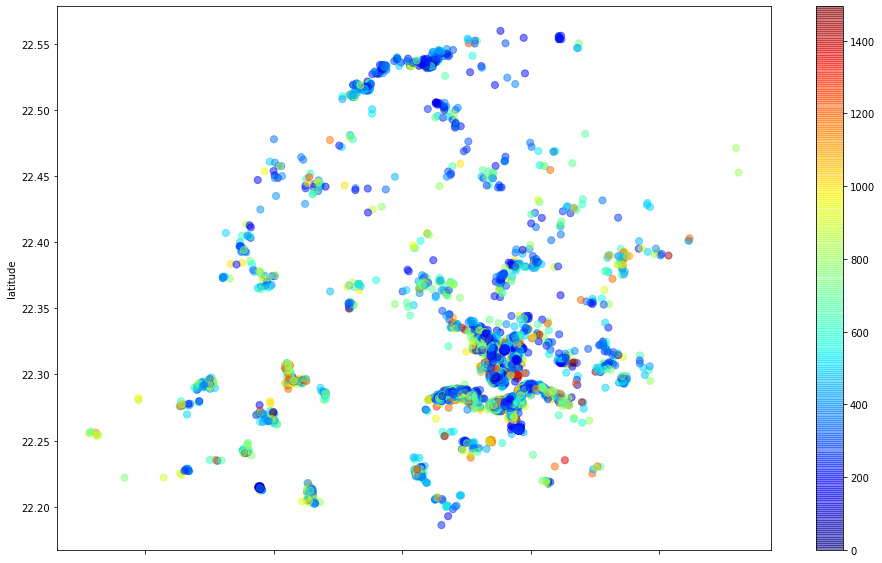

In [0]:
# DADOS TRATADOS 
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=50, cmap=plt.get_cmap('jet'), figsize=(16,10));

Podemos ver quer ficou muito mais "legível" e fácil de se perceber o que acontece no gráfico.

### **Q10. Dando uma cara legal ao gráfico**

Vamos dar um design bacana no projeto, usaremos a biblioteca `Folium` para plotarmos 2 tipos de grafico:
  
  * `Choropleth` - Mapa tematico para podermos distribuir nossas informações obtidas do dataset e do *geojson*
  
  * `Heatmap` - Mapa de calor para mostrar a onde a maioria das pessoas interagem.

*Mais sobre geojson* [geojson]('https://enterprise.arcgis.com/pt-br/portal/latest/use/geojson.htm')
  


In [0]:
#Importando pacotes/libs

!pip install folium
import folium
from folium.plugins import HeatMap
import json
import warnings
import numpy as np
from IPython.display import IFrame
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
print(folium.__version__)

0.8.3


In [0]:
# Function para setar valores padroes para os graficos
def generateBaseMap(default_location=[22.303927, 114.172932], default_zoom_start=12):
    base_map = folium.Map(location=default_location,tiles='https://{s}.basemaps.cartocdn.com/rastertiles/dark_all/{z}/{x}/{y}.png', attr='Stamen Terrain',control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [0]:
# Moficando o nome do distrito para ser compativel
df_clean['neighbourhood'] = df_clean['neighbourhood'].replace(['Central & Western'], 'Central and Western')

In [0]:
#Criando uma copia da estrutura do geojson
hk_geo = r'hkg_mod.geojson'
with open(hk_geo, encoding="utf8") as f: 
    map_data = f.readlines()
    map_data = [json.loads(line) for line in map_data]
map_data = map_data[0]

#Criando dicionario
distrito = []

#Looping para obter o nomes do distrito e index 
for i in range(len(map_data['features'])):
    distrito.append(map_data['features'][i]['properties']['name_1'])
distrito = pnd.DataFrame({'Sort_Index': range(len(map_data['features'])), 'name_1': distrito})

In [0]:
distrito

,Sort_Index,name_1
0,0,Islands
1,1,Tai Po
2,2,North
3,3,Sai Kung
4,4,Wong Tai Sin
5,5,Yau Tsim Mong
6,6,Central and Western
7,7,Sham Shui Po
8,8,Eastern
9,9,Southern


In [0]:
# Camada 1
[key for key in map_data]

['type', 'features']

In [0]:
# Camada 2 sobre Camada 1 - 'features'
[key for key in map_data['features'][0]]

['type', 'geometry', 'properties']

In [0]:
# Camada 3 Sobre Camada 2 - 'geometry'
[key for key in map_data['features'][0]['geometry']]

['type', 'coordinates']

In [0]:
# Camada 3 sobre Camada 2 - 'properties'
[key for key in map_data['features'][0]['properties']]

['id_0',
 'iso',
 'name_0',
 'id_1',
 'name_1',
 'nl_name_1',
 'varname_1',
 'type_1',
 'engtype_1',
 'cartodb_id',
 'created_at',
 'updated_at',
 'tooltip1',
 'tooltip2']

In [0]:
# Obtendo valores para inserir no lista
mediapreco  = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)
medianoites = df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)
mediaavali = df_clean.groupby(['neighbourhood']).number_of_reviews.sum().sort_values(ascending=False)
topdistrict = df_clean.neighbourhood.value_counts().sort_values(ascending=False)

# Criando lista
distrito_x = {
  'top_ngbhood_1': topdistrict.astype(float),
  'review_1': mediaavali.astype(float).map('{:,.0f}'.format),
  'avgnight_1': medianoites.astype(float).map('{:,.0f}'.format),
  'avgprice_1': mediapreco.map('HDK$ {:,.2f}'.format),
   }

#Criando dataset com a lsita
dfdistrito = pnd.DataFrame(distrito_x, columns=['name_1','top_ngbhood_1','review_1','avgnight_1','avgprice_1'])
dfdistrito.sort_values('review_1', ascending=False, inplace=True)
dfdistrito["name_1"] = dfdistrito.index
#Modificando indexs
dfdistrito.index = distrito.Sort_Index.tolist()


In [0]:
# Output dataset 
dfdistrito

,name_1,top_ngbhood_1,review_1,avgnight_1,avgprice_1
0,Kwun Tong,57.0,817,5,HDK$ 477.72
1,Southern,71.0,716,3,HDK$ 683.54
2,Wong Tai Sin,24.0,653,7,HDK$ 460.04
3,Tai Po,52.0,603,3,HDK$ 518.87
4,Tsuen Wan,61.0,563,3,HDK$ 625.31
5,Tuen Mun,54.0,538,4,HDK$ 505.24
6,Kowloon City,442.0,"4,325",9,HDK$ 511.18
7,Wan Chai,2150.0,"35,777",12,HDK$ 570.52
8,Central and Western,2318.0,"33,109",6,HDK$ 685.81
9,Sham Shui Po,223.0,"3,976",10,HDK$ 439.99


In [0]:
# Modificando valores de top_ngbhood_1 para serem e mais visiveis e compactos no grafico
dfdistrito.loc[dfdistrito.top_ngbhood_1 <= 100, 'top_ngbhood_1'] = 10
dfdistrito.loc[(dfdistrito.top_ngbhood_1 > 100) & (dfdistrito.top_ngbhood_1 <= 200), 'top_ngbhood_1'] = 20.00
dfdistrito.loc[(dfdistrito.top_ngbhood_1 > 200) & (dfdistrito.top_ngbhood_1 <= 300), 'top_ngbhood_1'] = 30.00
dfdistrito.loc[(dfdistrito.top_ngbhood_1 > 300) & (dfdistrito.top_ngbhood_1 <= 500), 'top_ngbhood_1'] = 40.00
dfdistrito.loc[(dfdistrito.top_ngbhood_1 > 1000) & (dfdistrito.top_ngbhood_1 <= 2000), 'top_ngbhood_1'] = 50.00
dfdistrito.loc[(dfdistrito.top_ngbhood_1 > 2000) & (dfdistrito.top_ngbhood_1 <= 3000), 'top_ngbhood_1'] = 50.00
dfdistrito.loc[(dfdistrito.top_ngbhood_1 > 3000), 'top_ngbhood_1'] = 70

In [0]:
# Junção de dois datasets
distrito_mapping = distrito.merge(dfdistrito, on='name_1')
distrito_mapping = distrito_mapping.sort_values(by=['Sort_Index']).reset_index(drop=True)
#output
distrito_mapping

,Sort_Index,name_1,top_ngbhood_1,review_1,avgnight_1,avgprice_1
0,0,Islands,40.0,"13,672",6,HDK$ 631.96
1,1,Tai Po,10.0,603,3,HDK$ 518.87
2,2,North,30.0,"1,449",2,HDK$ 372.95
3,3,Sai Kung,20.0,"1,890",5,HDK$ 584.55
4,4,Wong Tai Sin,10.0,653,7,HDK$ 460.04
5,5,Yau Tsim Mong,70.0,"142,390",4,HDK$ 510.67
6,6,Central and Western,50.0,"33,109",6,HDK$ 685.81
7,7,Sham Shui Po,30.0,"3,976",10,HDK$ 439.99
8,8,Eastern,40.0,"3,028",8,HDK$ 536.33
9,9,Southern,10.0,716,3,HDK$ 683.54


**Dicionário das variáveis**

* ***Sort_Index*** - Número de id gerado para identificar os distritos.
* ***name_1*** - Nome dos distritos.
* ***top_ngbhood_1*** - Numero para identificar os distritos com mais frequencia de aluguel.
* ***review_1*** - Quantidade de avaliações.
* ***avgnight_1*** - Media de noites.
* ***avgprice_1*** - Media de preço de aluguel por distrito.

In [0]:
# Aplicando novas propriedades no geojson
for idx in range(len(distrito_mapping)):
    map_data['features'][idx]['properties']['top_ngbhood_1'] = distrito_mapping.top_ngbhood_1[idx]
    map_data['features'][idx]['properties']['review_1'] = distrito_mapping.review_1[idx]
    map_data['features'][idx]['properties']['avgnight_1'] = distrito_mapping.avgnight_1[idx]
    map_data['features'][idx]['properties']['avgprice_1'] = distrito_mapping.avgprice_1[idx]

In [0]:
#Salvando em um novo arquivo geojson
with open('honkong_updt.geojson', 'w') as output:
    json.dump(map_data,output)

    
# Simples verificada
print(map_data['features'][0]['properties'])


{'id_0': 102, 'iso': 'HKG', 'name_0': 'Hong Kong', 'id_1': 3, 'name_1': 'Islands', 'nl_name_1': None, 'varname_1': None, 'type_1': 'District', 'engtype_1': 'District', 'cartodb_id': 3, 'created_at': '2015-06-09T13:14:01Z', 'updated_at': '2015-06-09T13:14:01Z', 'tooltip1': '離島 26%', 'tooltip2': '離島 18%', 'top_ngbhood_1': 40.0, 'review_1': '13,672', 'avgnight_1': '6', 'avgprice_1': 'HDK$ 631.96'}


### Mapa tematico (choropleth)

In [0]:
# Chamando funçao no objeto
base_map = generateBaseMap()

# importando arquivo com nomes dos distritos e valor do total total de quantas vezes os determinado distritos foi utilizado no dataset

data = distrito_mapping.copy()
#data.head()

hk_geo = map_data
#voter_proportion = data[['name_1','avgnight_1']] 
# Importnado geojson  


#Plotando o grafico
choropleth = folium.Choropleth(
    #arquivo geojson
    geo_data = map_data,
    name = 'choropleth',
    #arquivo distritos
    data = data,
    # colunas do arquivo distritos
    columns = ['name_1', 'top_ngbhood_1'],
    # chaves e valor do geojson
    key_on = 'feature.properties.name_1',
    fill_color = 'OrRd',
    line_color = 'black',
    fill_opacity = 0.5,
    line_opacity = 0.2,
    legend_name = 'DISTRITOS MAIS POPULOSOS', 
    highlight = True
).add_to(base_map)

folium.LayerControl().add_to(base_map)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip
        #PopUp do grafico
       (fields=['name_1','review_1','avgnight_1','avgprice_1'],
        aliases=['Distrito','Avaliacoes','Media de noites','Preco medio'],localize=True))

#Salvando em um arquivo .html
base_map.save('base_map_choromap.html')
base_map

### Mapa de calor (Heatmap)

In [0]:
# MAPA DE CALOR
df_copy = df_clean.copy()

base_map = generateBaseMap()
# Utilizando long e lat em relação ao preco
HeatMap(data=df_copy[['price','latitude','longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), blur=11, radius=6, max_zoom=50).add_to(base_map)


#Salvando em um arquivo .html
base_map.save('base_map_hetmap.html')
#display
base_map

In [0]:
# CONVERSAO DOLAR HONG KONG PARA REAL DIA 08/06/2020

convert = df_clean.price.max() * 0.62
print("APARTAMENTO MAIS CARO: HKD${:0.02f}".format(df_clean.price.max()))
print("VALOR EM REAL: R${:0.02f}".format(convert))

APARTAMENTO MAIS CARO: HKD$1495.00
VALOR EM REAL: R$926.90


## Conclusão


Alguns pontos importantes que percebi.

1 - Com toda essa análise percebi que não pode apenas usar alguns métodos/funções e deduzir que seria uma resultado ideal, uma simples dúvida para confirmar se *Tai Po* era realmente o distrito mais caro, mais visitado etc., me fez fazer uma pesquisa de 10 min fez com que eu repensasse meu resultado.

2 - Tratar Outlier é extremamente essencial.

3 - Toda análise simples pode ficar mais incrementada.

4 - Não há tanta diferença em contratar um Entire home/apt ou Private Room pois dependendo eles ainda vão ver pequenos, e só ira mudar o que é compartilhado ou não.

5 - Caso Algum Brasileiro queira visitar Hong Kong poderá aproveitar bem pois sua cotação em relação ao real e baixa, visto que como resultado do aluguel mais caro (depois de tratar os dados) é de HKD 1495,00 e em Real isso se transforma em R$ 926,90. - *08/06/2020*,

6 - As grande parte dos alugueis mais caros e baratos estão centradas em um mesmo lugar, na ponta da ilha de Hong Kong e em Hong Kong `Yau Tsim Mong`,`Central and Western` e `Wan Chai`

7 - Esse projeto me fez realizar varias pesquisar que foram além dos dados fornecidos, me mostrando um lado que não conhecia deste pais, que me deixou bastante intrigado, que foi saber que a grande maioria dos apartamentos de Hong Kong de classe media e classe media baixa em sua maioria não são de longe luxuosos, mas sim compactos ou nem tanto, onde talvez a nossa garagem de casa de para fazer 3 *Entire Home/apt* tranquilo.

Bom, essa foi uma análise intermediária com foco em ensinar-me a questionar os dados, tirar insights, ir além dos dados fornecidos e principalmente aprender a fazer boas perguntas.

#### **Data Science na Prática 2.0**
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

*by [sigmoidal.ai](https://sigmoidal.ai)*